In [1]:
# Cell 1: Imports and Style Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default plot size

print("✅ Libraries Imported ")

✅ Libraries Imported 


In [2]:
# Cell 2: Load Data
# Option A: Titanic (Built-in)
df = sns.load_dataset('titanic')
dataset_name = "Titanic Dataset"

# Option B: Student Performance (Uncomment below if you have uploaded the CSV)
# df = pd.read_csv('StudentsPerformance.csv')
# dataset_name = "Student Performance Dataset"

print(f"✅ {dataset_name} Loaded Successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

✅ Titanic Dataset Loaded Successfully!
Shape: 891 rows, 15 columns


In [3]:
# Cell 3: Data Structure Overview
print(f"--- Structure of {dataset_name} ---\n")

# Display first 5 rows
display(df.head())

# Create a clean summary dataframe
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Values': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df)) * 100
})

print("\n--- Feature Analysis ---")
display(info_df.sort_values(by='Null Values', ascending=False))

--- Structure of Titanic Dataset ---



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



--- Feature Analysis ---


,Data Type,Non-Null Count,Null Values,Null %
deck,category,203,688,77.216611
age,float64,714,177,19.865320
embarked,object,889,2,0.224467
embark_town,object,889,2,0.224467
sex,object,891,0,0.000000
pclass,int64,891,0,0.000000
survived,int64,891,0,0.000000
fare,float64,891,0,0.000000
parch,int64,891,0,0.000000
sibsp,int64,891,0,0.000000


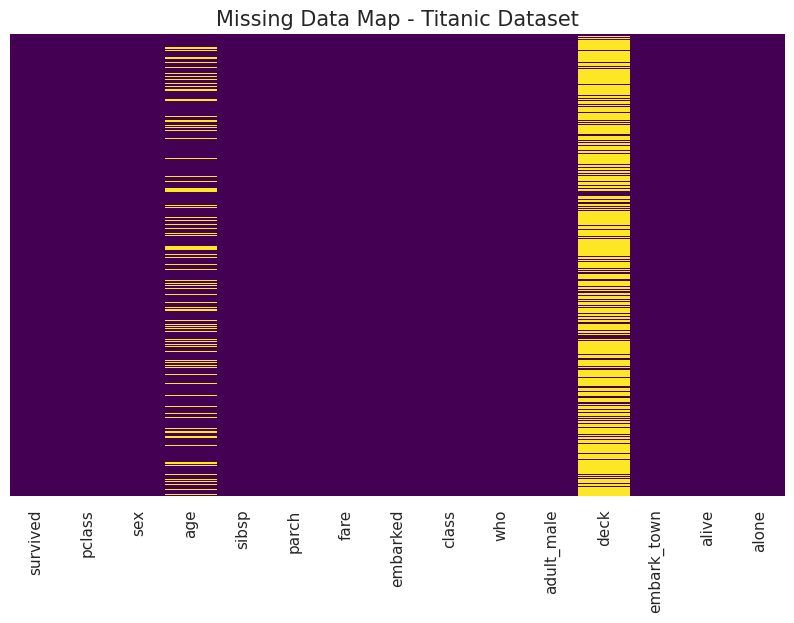

Observation: The yellow lines represent missing data. 'deck' (cabin) has massive gaps.


In [4]:
# Cell 4: Missing Value Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title(f'Missing Data Map - {dataset_name}', fontsize=15)
plt.show()

print("Observation: The yellow lines represent missing data. 'deck' (cabin) has massive gaps.")

In [5]:
# Cell 5: Statistical Summaries
print("--- Numerical Statistics (Mean, Std, Min, Max) ---")
display(df.describe().T.style.background_gradient(cmap='Blues'))

print("\n--- Categorical Statistics (Unique, Top, Freq) ---")
# select_dtypes includes objects (text) and categories
display(df.select_dtypes(include=['object', 'category']).describe().T)

--- Numerical Statistics (Mean, Std, Min, Max) ---


,count,mean,std,min,25%,50%,75%,max
survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
sibsp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200



--- Categorical Statistics (Unique, Top, Freq) ---


,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549


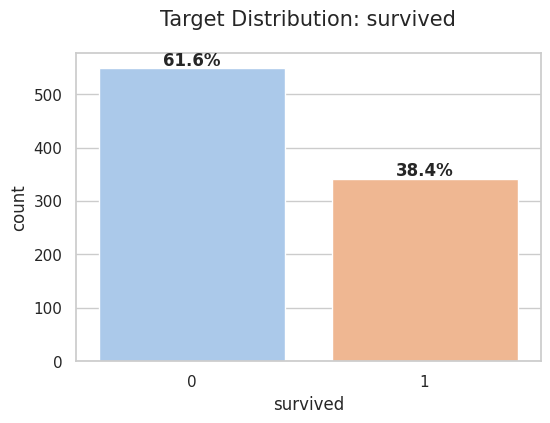

In [11]:
# Cell 6: Target Variable Distribution
target_col = 'survived'

plt.figure(figsize=(6, 4))

# FIX: Added hue=target_col and legend=False to remove the Future Warning
ax = sns.countplot(x=target_col, data=df, hue=target_col, palette='pastel', legend=False)

# Add percentages on top of bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2
    y = height + 5 # Offset to sit slightly above the bar
    ax.annotate(percentage, (x, y), ha='center', fontweight='bold')

plt.title(f'Target Distribution: {target_col}', fontsize=15, pad=20)
plt.show()

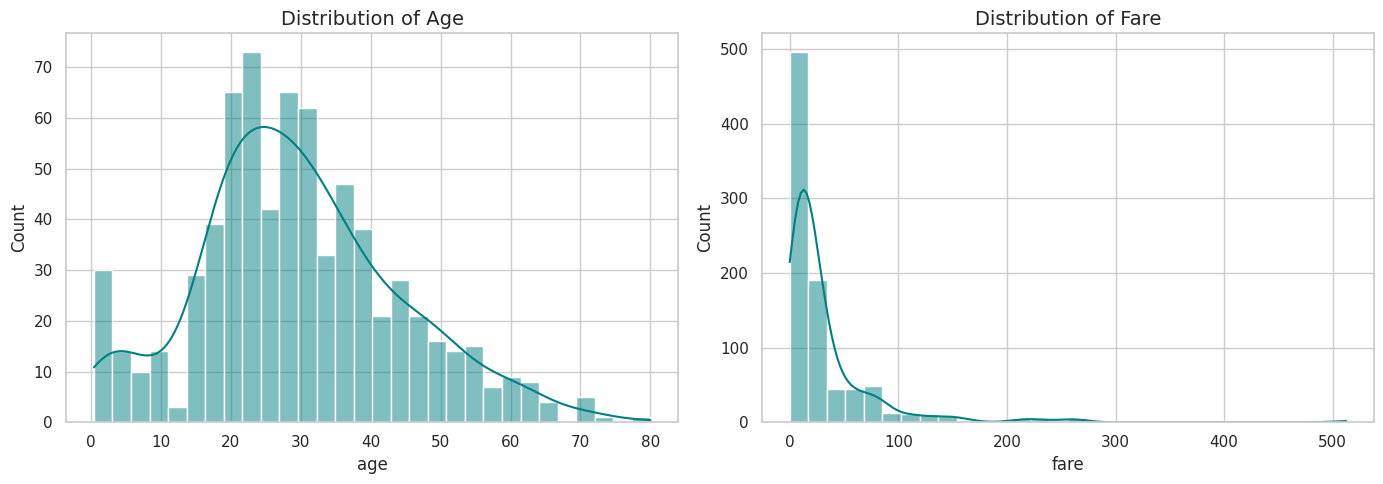

In [7]:
# Cell 7: Numerical Feature Distribution
# We pick key numerical columns
num_cols = ['age', 'fare']

plt.figure(figsize=(14, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True, color='teal', bins=30)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)

plt.tight_layout()
plt.show()

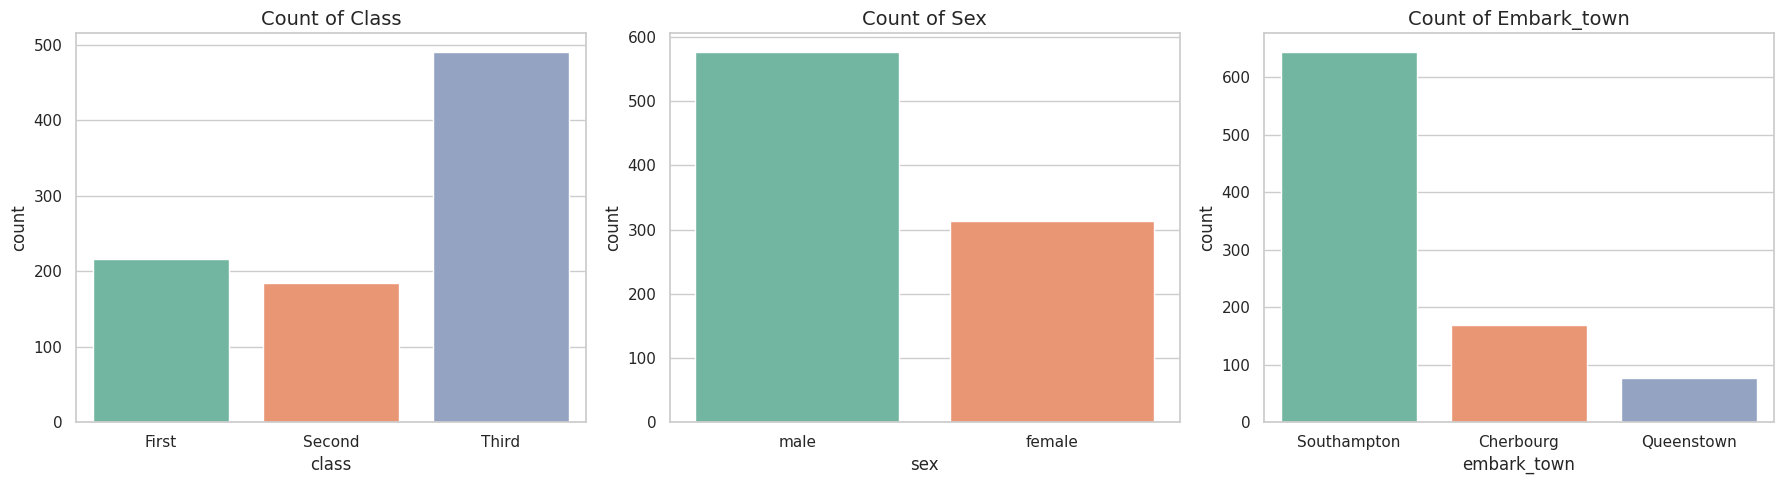

In [10]:
# Cell 8: Categorical Feature Analysis (Fixed)
cat_cols = ['class', 'sex', 'embark_town']

plt.figure(figsize=(18, 5))

for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)

    # FIX: We added hue=col and legend=False to satisfy the new Seaborn requirements
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)

    plt.title(f'Count of {col.capitalize()}', fontsize=14)

plt.tight_layout()
plt.show()

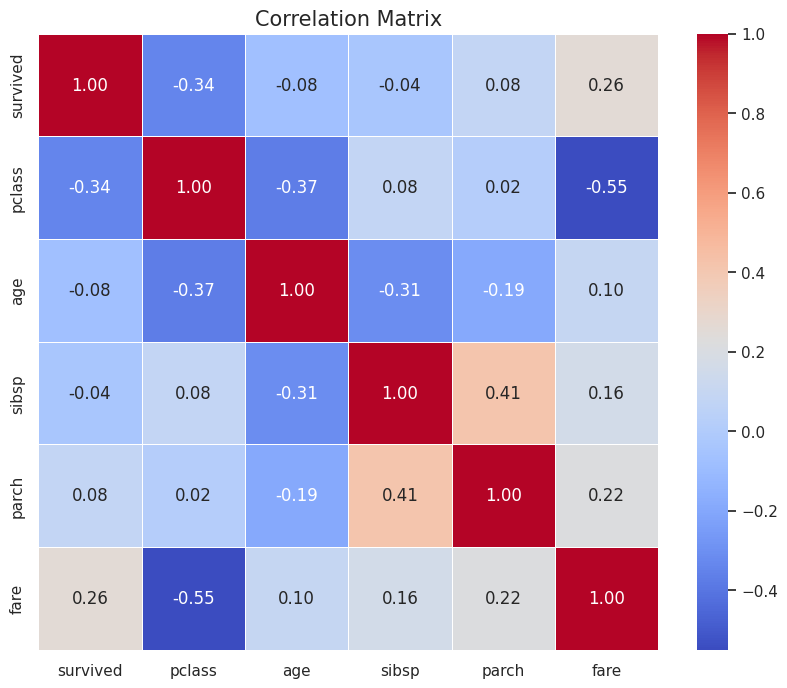

In [9]:
# Cell 9: Correlation Heatmap
# We only select numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=15)
plt.show()